# Reading and maping data

In [496]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer, Normalizer, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [497]:
df = pd.read_csv("t-shirts.csv")

size_mapping = {'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, 'XXL': 6, '3XL': 7}
material_mapping = {'nylon': 1, 'polyester': 2, 'cotton': 3, 'linen': 4, 'silk': 5}
color_mapping = {'white': 1, 'black': 2, 'cream': 3, 'navy': 4, 'red': 5, 'blue': 6, 'yellow': 7, 'orange': 8, 'violet': 9, 'green': 10}
sleeves_mapping = {'short': 1, 'long': 2}
demand_mapping = {'low': 1, 'medium': 2, 'high': 3}

df['size'] = df['size'].map(size_mapping)
df['material'] = df['material'].map(material_mapping)
df['color'] = df['color'].map(color_mapping)
df['sleeves'] = df['sleeves'].map(sleeves_mapping)
df['demand'] = df['demand'].map(demand_mapping)

# Data Exploration

In [498]:
df.describe()

,size,material,color,sleeves,demand
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,4.001850,2.43615,4.484600,1.505850,2.331950
std,1.720231,1.21725,2.764515,0.499978,0.674079
min,1.000000,1.00000,1.000000,1.000000,1.000000
25%,3.000000,1.00000,2.000000,1.000000,2.000000
50%,4.000000,2.00000,4.000000,2.000000,2.000000
75%,5.000000,3.00000,7.000000,2.000000,3.000000
max,7.000000,5.00000,10.000000,2.000000,3.000000


In [499]:
df.head(10)

,size,material,color,sleeves,demand
0,2,1,1,2,2
1,5,2,3,1,3
2,2,5,6,1,2
3,3,3,2,1,2
4,5,2,8,2,2
5,1,2,2,1,2
6,6,2,10,1,2
7,4,4,7,1,3
8,5,4,3,2,3
9,1,1,5,1,3


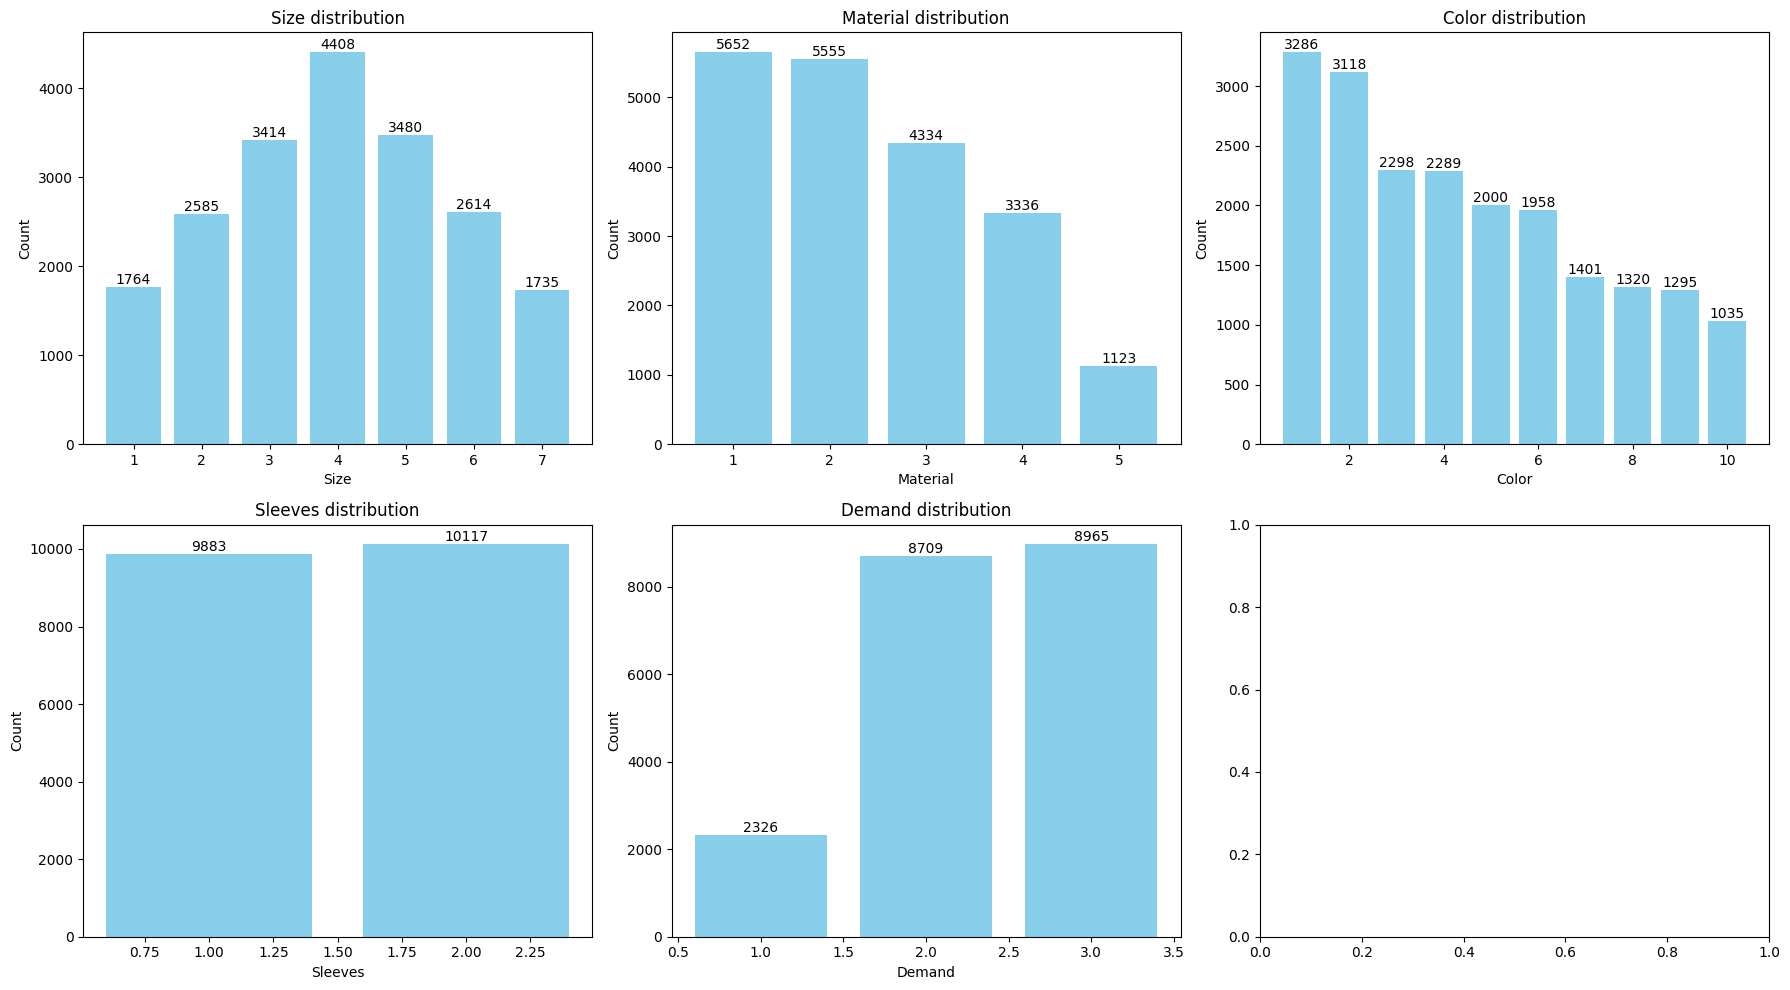

In [500]:
def draw_diagrams(data):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Гистограмма для размера
    size_counts = data['size'].value_counts()
    bars = axs[0, 0].bar(size_counts.index, size_counts.values, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        axs[0, 0].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    axs[0, 0].set_xlabel('Size')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].set_title('Size distribution')

    # Гистограмма для материала
    material_counts = data['material'].value_counts()
    bars = axs[0, 1].bar(material_counts.index, material_counts.values, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        axs[0, 1].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    axs[0, 1].set_xlabel('Material')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_title('Material distribution')

    # Гистограмма для цвета
    color_counts = data['color'].value_counts()
    bars = axs[0, 2].bar(color_counts.index, color_counts.values, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        axs[0, 2].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    axs[0, 2].set_xlabel('Color')
    axs[0, 2].set_ylabel('Count')
    axs[0, 2].set_title('Color distribution')

    # Гистограмма для рукавов
    sleeves_counts = data['sleeves'].value_counts()
    bars = axs[1, 0].bar(sleeves_counts.index, sleeves_counts.values, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        axs[1, 0].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    axs[1, 0].set_xlabel('Sleeves')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].set_title('Sleeves distribution')

    # Гистограмма для спроса
    demand_counts = data['demand'].value_counts()
    bars = axs[1, 1].bar(demand_counts.index, demand_counts.values, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        axs[1, 1].text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    axs[1, 1].set_xlabel('Demand')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].set_title('Demand distribution')

    plt.tight_layout()
    plt.show()

draw_diagrams(df)

# Data preprocesing

In [501]:
def standardize(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled

def normalize(X_train, X_val):
    scaler = Normalizer()
    X_train_scaled = scaler.fit(X_train).transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled

def discretize(X_train, X_val, n_bins=10, strategy='uniform'):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_train_scaled = discretizer.fit_transform(X_train)
    X_val_scaled = discretizer.transform(X_val)
    return X_train_scaled, X_val_scaled

def select_features(X_train, X_val, y_train, k=3):
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)
    return X_train_selected, X_val_selected

def apply_pca(X_train, X_val, n_components=3):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return X_train_pca, X_val_pca

def preprocess_data(X_train, X_val, y_train=None, method='standardization', **kwargs):
    if method == 'standardization':
        return standardize(X_train, X_val)
    elif method == 'normalization':
        return normalize(X_train, X_val)
    elif method == 'discretization':
        return discretize(X_train, X_val, **kwargs)
    elif method == 'feature_selection':
        if y_train is None:
            raise ValueError("y_train is required for feature selection")
        return select_features(X_train, X_val, y_train, **kwargs)
    elif method == 'pca':
        return apply_pca(X_train, X_val, **kwargs)
    else:
        raise ValueError(f"Unknown method: {method}")

# Classifiers

In [502]:
def initialize_naive_bayes(var_smoothing=1e-9):
    return GaussianNB(var_smoothing=var_smoothing)

def initialize_decision_tree(max_depth=7):
    return DecisionTreeClassifier(max_depth=max_depth)

def initialize_random_forest(n_estimators=100):
    return RandomForestClassifier(n_estimators=n_estimators)

def initialize_svm(C=1.0, kernel='rbf', degree=3, gamma='scale'):
    return SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)

def initialize_classifier(classifier, **kwargs):
    if classifier == 'Naive Bayes':
        return initialize_naive_bayes(**kwargs)
    
    elif classifier == 'Decision Tree':
        return initialize_decision_tree(**kwargs)
    
    elif classifier == 'Random Forest':
        return initialize_random_forest(**kwargs)
    
    elif classifier == 'SVM':
        return initialize_svm(**kwargs)
    
    else:
        raise ValueError(f"Unknown method: {classifier}")


# Training and evaluating

Metody do trenowania i wywołania modelu

In [503]:
def train_and_evaluate(X_train, X_val, y_train, y_val, classifier):
    report_df, conf_matrix_df, time_taken = train(X_train, X_val, y_train, y_val, classifier)
    display(report_df)
    display(conf_matrix_df)
    print(f"Time taken: {time_taken} seconds")


def train(X_train, X_val, y_train, y_val, classifier):
    start_time = time.time()
    classifier.fit(X_train, y_train)
    time_taken = time.time() - start_time
    
    y_pred = classifier.predict(X_val)
    
    report_dict = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    report_df = pd.DataFrame(report_dict).transpose()

    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=[f'Actual {i}' for i in classifier.classes_], 
                                  columns=[f'Predicted {i}' for i in classifier.classes_])


    return report_df, conf_matrix_df, time_taken

podział na dane testowe i walidacyjne, definiowania nazw metod preprocesingu, definiowanie nazw metod klasyfikatorów

In [504]:
X = df.drop('demand', axis=1)
y = df['demand']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing_methods = [
                         'none',
                         'standardization',
                         'normalization',
                         'discretization',
                         'feature_selection',
                         'pca',
                         ]

classifiers = [
               'Naive Bayes', 
               'Decision Tree', 
               'Random Forest', 
               'SVM'
               ]

### Naive Bayes

In [505]:
for method in preprocessing_methods:
    if method == 'none':
        X_train_processed, X_val_processed = X_train, X_val
    else:
        X_train_processed, X_val_processed = preprocess_data(X_train, X_val, y_train, method)
    print(f"\n----------------------- Naive Bayes | Method: {method} -----------------------")
    train_and_evaluate(X_train_processed, X_val_processed, y_train, y_val, initialize_classifier(classifier=classifiers[0]))


----------------------- Naive Bayes | Method: none -----------------------


,precision,recall,f1-score,support
1,0.664430,0.216630,0.326733,457.00000
2,0.651948,0.721264,0.684857,1740.00000
3,0.701454,0.749307,0.724591,1803.00000
accuracy,0.676250,0.676250,0.676250,0.67625
macro avg,0.672610,0.562400,0.578727,4000.00000
weighted avg,0.675689,0.676250,0.661851,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,99,225,133
Actual 2,43,1255,442
Actual 3,7,445,1351


Time taken: 0.007089138031005859 seconds

----------------------- Naive Bayes | Method: standardization -----------------------


,precision,recall,f1-score,support
1,0.664430,0.216630,0.326733,457.00000
2,0.651948,0.721264,0.684857,1740.00000
3,0.701454,0.749307,0.724591,1803.00000
accuracy,0.676250,0.676250,0.676250,0.67625
macro avg,0.672610,0.562400,0.578727,4000.00000
weighted avg,0.675689,0.676250,0.661851,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,99,225,133
Actual 2,43,1255,442
Actual 3,7,445,1351


Time taken: 0.003998756408691406 seconds

----------------------- Naive Bayes | Method: normalization -----------------------


,precision,recall,f1-score,support
1,0.441696,0.273523,0.337838,457.0000
2,0.651190,0.628736,0.639766,1740.0000
3,0.633775,0.716029,0.672396,1803.0000
accuracy,0.627500,0.627500,0.627500,0.6275
macro avg,0.575554,0.539429,0.550000,4000.0000
weighted avg,0.619406,0.627500,0.619979,4000.0000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,125,135,197
Actual 2,97,1094,549
Actual 3,61,451,1291


Time taken: 0.004075288772583008 seconds

----------------------- Naive Bayes | Method: discretization -----------------------


,precision,recall,f1-score,support
1,0.785714,0.192560,0.309315,457.00000
2,0.649533,0.718966,0.682488,1740.00000
3,0.693170,0.754298,0.722444,1803.00000
accuracy,0.674750,0.674750,0.674750,0.67475
macro avg,0.709472,0.555275,0.571415,4000.00000
weighted avg,0.684761,0.674750,0.657863,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,88,232,137
Actual 2,24,1251,465
Actual 3,0,443,1360


Time taken: 0.005064487457275391 seconds

----------------------- Naive Bayes | Method: feature_selection -----------------------


,precision,recall,f1-score,support
1,0.613793,0.194748,0.295681,457.000
2,0.653361,0.714943,0.682766,1740.000
3,0.686315,0.742651,0.713372,1803.000
accuracy,0.668000,0.668000,0.668000,0.668
macro avg,0.651156,0.550781,0.563940,4000.000
weighted avg,0.663694,0.668000,0.652337,4000.000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,89,215,153
Actual 2,37,1244,459
Actual 3,19,445,1339


Time taken: 0.0041103363037109375 seconds

----------------------- Naive Bayes | Method: pca -----------------------


,precision,recall,f1-score,support
1,0.553191,0.227571,0.322481,457.00000
2,0.551818,0.584483,0.567681,1740.00000
3,0.594210,0.648918,0.620361,1803.00000
accuracy,0.572750,0.572750,0.572750,0.57275
macro avg,0.566406,0.486991,0.503507,4000.00000
weighted avg,0.571083,0.572750,0.563412,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,104,223,130
Actual 2,54,1017,669
Actual 3,30,603,1170


Time taken: 0.003053426742553711 seconds


### Decision Tree

In [506]:
for method in preprocessing_methods:
    if method == 'none':
        X_train_processed, X_val_processed = X_train, X_val
    else:
        X_train_processed, X_val_processed = preprocess_data(X_train, X_val, y_train, method)
    print(f"\n----------------------- Decision Tree | Method: {method} -----------------------")
    train_and_evaluate(X_train_processed, X_val_processed, y_train, y_val, initialize_classifier(classifier=classifiers[1]))


----------------------- Decision Tree | Method: none -----------------------


,precision,recall,f1-score,support
1,0.997126,0.759300,0.862112,457.00000
2,0.905895,0.962644,0.933408,1740.00000
3,0.964504,0.964504,0.964504,1803.00000
accuracy,0.940250,0.940250,0.940250,0.94025
macro avg,0.955842,0.895482,0.920008,4000.00000
weighted avg,0.942736,0.940250,0.939279,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,347,110,0
Actual 2,1,1675,64
Actual 3,0,64,1739


Time taken: 0.011095285415649414 seconds

----------------------- Decision Tree | Method: standardization -----------------------


,precision,recall,f1-score,support
1,0.997126,0.759300,0.862112,457.00000
2,0.905895,0.962644,0.933408,1740.00000
3,0.964504,0.964504,0.964504,1803.00000
accuracy,0.940250,0.940250,0.940250,0.94025
macro avg,0.955842,0.895482,0.920008,4000.00000
weighted avg,0.942736,0.940250,0.939279,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,347,110,0
Actual 2,1,1675,64
Actual 3,0,64,1739


Time taken: 0.006088733673095703 seconds

----------------------- Decision Tree | Method: normalization -----------------------


,precision,recall,f1-score,support
1,0.847887,0.658643,0.741379,457.0000
2,0.866159,0.914943,0.889883,1740.0000
3,0.899281,0.901276,0.900277,1803.0000
accuracy,0.879500,0.879500,0.879500,0.8795
macro avg,0.871109,0.824954,0.843846,4000.0000
weighted avg,0.879001,0.879500,0.877601,4000.0000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,301,92,64
Actual 2,30,1592,118
Actual 3,24,154,1625


Time taken: 0.012067794799804688 seconds

----------------------- Decision Tree | Method: discretization -----------------------


,precision,recall,f1-score,support
1,0.997126,0.759300,0.862112,457.00000
2,0.905895,0.962644,0.933408,1740.00000
3,0.964504,0.964504,0.964504,1803.00000
accuracy,0.940250,0.940250,0.940250,0.94025
macro avg,0.955842,0.895482,0.920008,4000.00000
weighted avg,0.942736,0.940250,0.939279,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,347,110,0
Actual 2,1,1675,64
Actual 3,0,64,1739


Time taken: 0.006067991256713867 seconds

----------------------- Decision Tree | Method: feature_selection -----------------------


,precision,recall,f1-score,support
1,0.778523,0.507659,0.614570,457.00000
2,0.765385,0.686207,0.723636,1740.00000
3,0.741830,0.881309,0.805577,1803.00000
accuracy,0.753750,0.753750,0.753750,0.75375
macro avg,0.761913,0.691725,0.714594,4000.00000
weighted avg,0.756269,0.753750,0.748110,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,232,152,73
Actual 2,66,1194,480
Actual 3,0,214,1589


Time taken: 0.005069255828857422 seconds

----------------------- Decision Tree | Method: pca -----------------------


,precision,recall,f1-score,support
1,0.994083,0.735230,0.845283,457.00000
2,0.645401,0.947701,0.767870,1740.00000
3,0.919603,0.564615,0.699656,1803.00000
accuracy,0.750750,0.750750,0.750750,0.75075
macro avg,0.853029,0.749182,0.770936,4000.00000
weighted avg,0.808834,0.750750,0.745967,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,336,121,0
Actual 2,2,1649,89
Actual 3,0,785,1018


Time taken: 0.011191844940185547 seconds


### Random Forest

In [507]:
for method in preprocessing_methods:
    if method == 'none':
        X_train_processed, X_val_processed = X_train, X_val
    else:
        X_train_processed, X_val_processed = preprocess_data(X_train, X_val, y_train, method)
    print(f"\n----------------------- Random Forest | Method: {method} -----------------------")
    train_and_evaluate(X_train_processed, X_val_processed, y_train, y_val, initialize_classifier(classifier=classifiers[2]))


----------------------- Random Forest | Method: none -----------------------


,precision,recall,f1-score,support
1,0.956621,0.916849,0.936313,457.0000
2,0.959842,0.975287,0.967503,1740.0000
3,0.986622,0.981697,0.984153,1803.0000
accuracy,0.971500,0.971500,0.971500,0.9715
macro avg,0.967695,0.957945,0.962656,4000.0000
weighted avg,0.971545,0.971500,0.971445,4000.0000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,419,38,0
Actual 2,19,1697,24
Actual 3,0,33,1770


Time taken: 0.5982837677001953 seconds

----------------------- Random Forest | Method: standardization -----------------------


,precision,recall,f1-score,support
1,0.965358,0.914661,0.939326,457.00000
2,0.965242,0.973563,0.969385,1740.00000
3,0.982892,0.987798,0.985339,1803.00000
accuracy,0.973250,0.973250,0.973250,0.97325
macro avg,0.971164,0.958674,0.964683,4000.00000
weighted avg,0.973211,0.973250,0.973142,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,418,39,0
Actual 2,15,1694,31
Actual 3,0,22,1781


Time taken: 0.5651345252990723 seconds

----------------------- Random Forest | Method: normalization -----------------------


,precision,recall,f1-score,support
1,0.947005,0.899344,0.922559,457.00000
2,0.950895,0.945977,0.948430,1740.00000
3,0.955858,0.972823,0.964266,1803.00000
accuracy,0.952750,0.952750,0.952750,0.95275
macro avg,0.951253,0.939381,0.945085,4000.00000
weighted avg,0.952688,0.952750,0.952612,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,411,36,10
Actual 2,23,1646,71
Actual 3,0,49,1754


Time taken: 1.0565757751464844 seconds

----------------------- Random Forest | Method: discretization -----------------------


,precision,recall,f1-score,support
1,0.946548,0.929978,0.938190,457.00000
2,0.963005,0.972414,0.967687,1740.00000
3,0.986622,0.981697,0.984153,1803.00000
accuracy,0.971750,0.971750,0.971750,0.97175
macro avg,0.965392,0.961363,0.963343,4000.00000
weighted avg,0.971770,0.971750,0.971739,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,425,32,0
Actual 2,24,1692,24
Actual 3,0,33,1770


Time taken: 0.5770354270935059 seconds

----------------------- Random Forest | Method: feature_selection -----------------------


,precision,recall,f1-score,support
1,0.778523,0.507659,0.614570,457.00000
2,0.765385,0.686207,0.723636,1740.00000
3,0.741830,0.881309,0.805577,1803.00000
accuracy,0.753750,0.753750,0.753750,0.75375
macro avg,0.761913,0.691725,0.714594,4000.00000
weighted avg,0.756269,0.753750,0.748110,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,232,152,73
Actual 2,66,1194,480
Actual 3,0,214,1589


Time taken: 0.502537727355957 seconds

----------------------- Random Forest | Method: pca -----------------------


,precision,recall,f1-score,support
1,0.956720,0.919037,0.937500,457.00000
2,0.960385,0.975287,0.967779,1740.00000
3,0.986622,0.981697,0.984153,1803.00000
accuracy,0.971750,0.971750,0.971750,0.97175
macro avg,0.967909,0.958674,0.963144,4000.00000
weighted avg,0.971793,0.971750,0.971700,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,420,37,0
Actual 2,19,1697,24
Actual 3,0,33,1770


Time taken: 1.1449732780456543 seconds


### SVM

In [508]:
for method in preprocessing_methods:
    if method == 'none':
        X_train_processed, X_val_processed = X_train, X_val
    else:
        X_train_processed, X_val_processed = preprocess_data(X_train, X_val, y_train, method)
    print(f"\n----------------------- SVM | Method: {method} -----------------------")
    train_and_evaluate(X_train_processed, X_val_processed, y_train, y_val, initialize_classifier(classifier=classifiers[3]))


----------------------- SVM | Method: none -----------------------


,precision,recall,f1-score,support
1,0.900744,0.794311,0.844186,457.0000
2,0.861505,0.908046,0.884163,1740.0000
3,0.927396,0.906822,0.916994,1803.0000
accuracy,0.894500,0.894500,0.894500,0.8945
macro avg,0.896549,0.869726,0.881781,4000.0000
weighted avg,0.895689,0.894500,0.894394,4000.0000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,363,86,8
Actual 2,40,1580,120
Actual 3,0,168,1635


Time taken: 5.201293230056763 seconds

----------------------- SVM | Method: standardization -----------------------


,precision,recall,f1-score,support
1,0.871795,0.818381,0.844244,457.00000
2,0.902579,0.905172,0.903874,1740.00000
3,0.912377,0.924016,0.918159,1803.00000
accuracy,0.903750,0.903750,0.903750,0.90375
macro avg,0.895583,0.882523,0.888759,4000.00000
weighted avg,0.903478,0.903750,0.903500,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,374,75,8
Actual 2,13,1575,152
Actual 3,42,95,1666


Time taken: 4.458511590957642 seconds

----------------------- SVM | Method: normalization -----------------------


,precision,recall,f1-score,support
1,0.890323,0.301969,0.450980,457.000
2,0.776931,0.820690,0.798211,1740.000
3,0.782262,0.870771,0.824147,1803.000
accuracy,0.784000,0.784000,0.784000,0.784
macro avg,0.816505,0.664477,0.691113,4000.000
weighted avg,0.792289,0.784000,0.770231,4000.000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,138,177,142
Actual 2,17,1428,295
Actual 3,0,233,1570


Time taken: 8.5320885181427 seconds

----------------------- SVM | Method: discretization -----------------------


,precision,recall,f1-score,support
1,0.859485,0.803063,0.830317,457.00000
2,0.881876,0.875287,0.878569,1740.00000
3,0.887866,0.909040,0.898328,1803.00000
accuracy,0.882250,0.882250,0.882250,0.88225
macro avg,0.876409,0.862464,0.869071,4000.00000
weighted avg,0.882018,0.882250,0.881963,4000.00000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,367,82,8
Actual 2,18,1523,199
Actual 3,42,122,1639


Time taken: 5.318838596343994 seconds

----------------------- SVM | Method: feature_selection -----------------------


,precision,recall,f1-score,support
1,0.826667,0.407002,0.545455,457.000
2,0.721989,0.692529,0.706952,1740.000
3,0.729820,0.852468,0.786390,1803.000
accuracy,0.732000,0.732000,0.732000,0.732
macro avg,0.759492,0.650666,0.679599,4000.000
weighted avg,0.737478,0.732000,0.724308,4000.000


,Predicted 1,Predicted 2,Predicted 3
Actual 1,186,198,73
Actual 2,39,1205,496
Actual 3,0,266,1537


Time taken: 8.117344856262207 seconds

----------------------- SVM | Method: pca -----------------------


KeyboardInterrupt: 